# Movie's Data Analysis

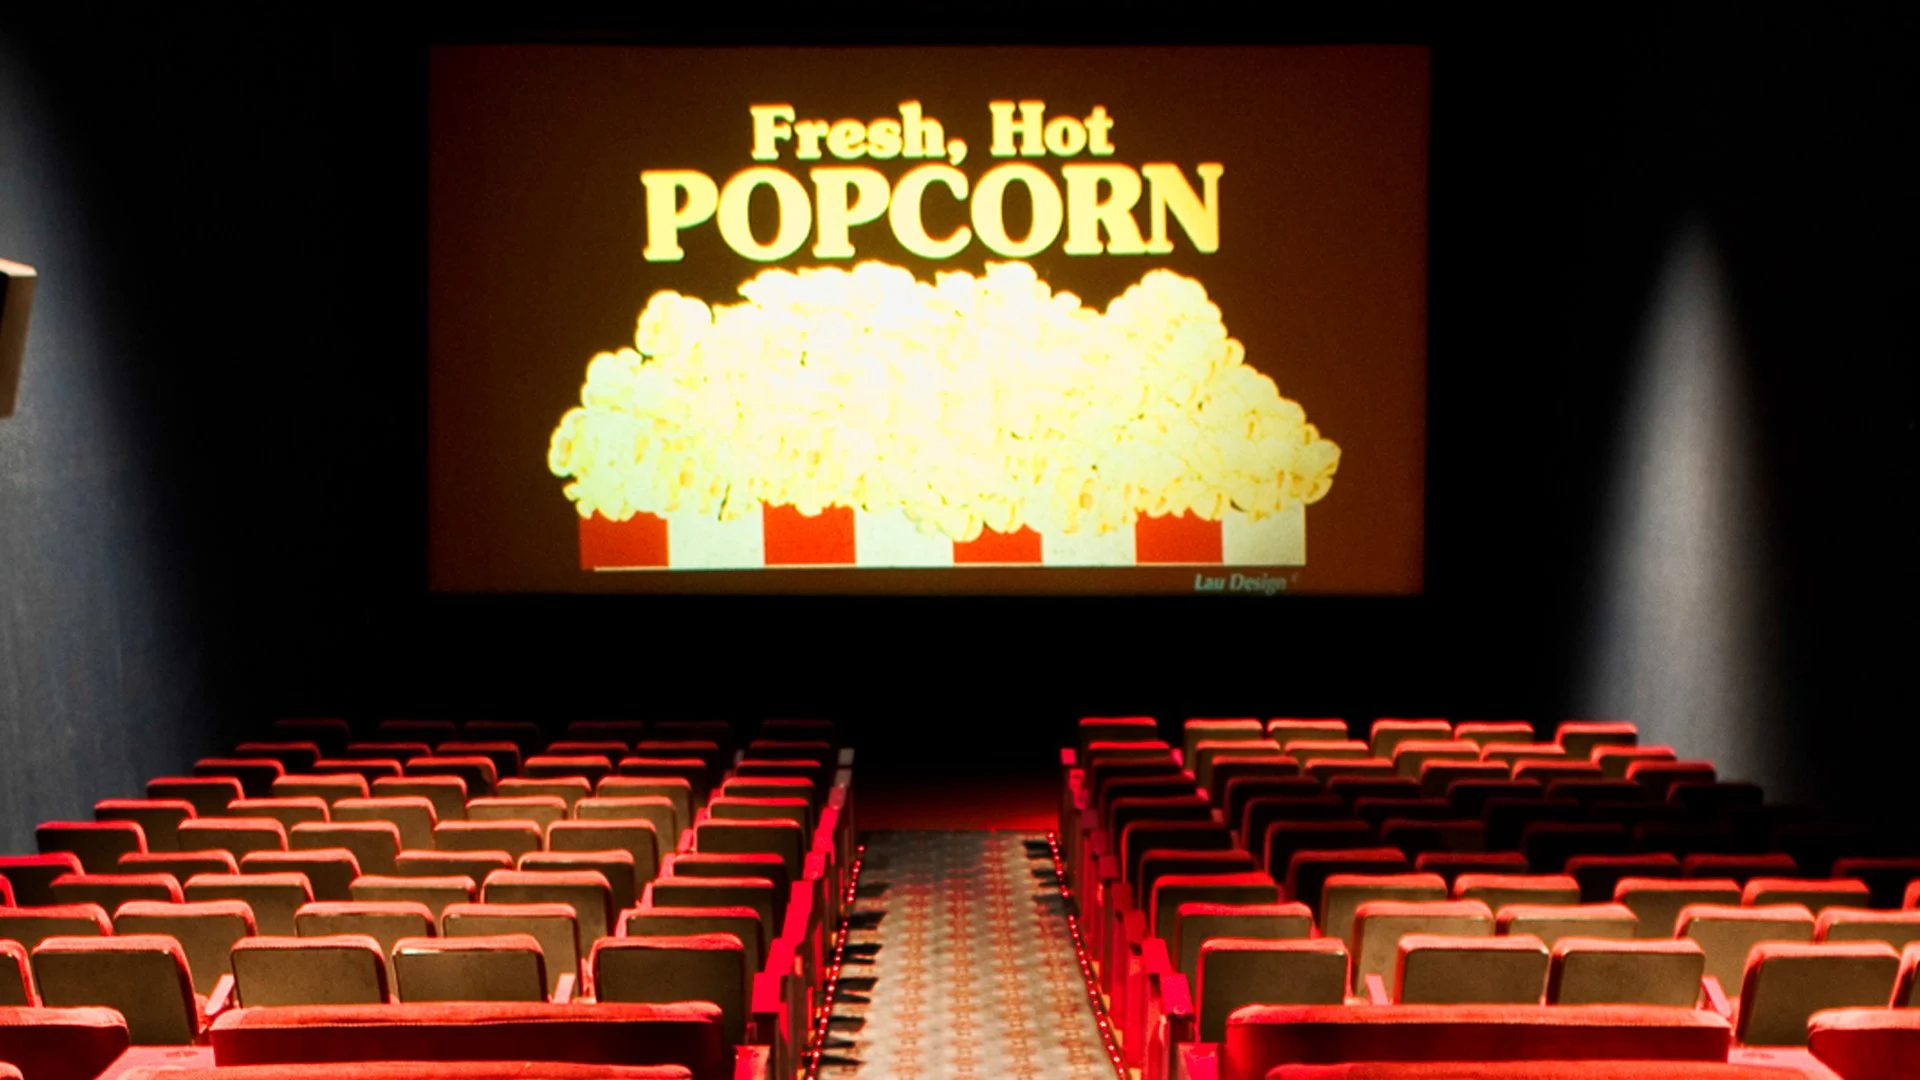

In [1]:
#necessary Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Make the connection with the db

conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

In [3]:
#select all the data from the movie basics table

pd.read_sql("""SELECT *
from movie_basics

ORDER BY MOVIE_ID;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
#select all the data from the movie basics table

pd.read_sql("""SELECT * FROM movie_ratings

ORDER BY MOVIE_ID;""", conn)

,movie_id,averagerating,numvotes
0,tt0063540,7.0,77
1,tt0066787,7.2,43
2,tt0069049,6.9,4517
3,tt0069204,6.1,13
4,tt0100275,6.5,119
...,...,...,...
73851,tt9913084,6.2,6
73852,tt9914286,8.7,136
73853,tt9914642,8.5,8
73854,tt9914942,6.6,5


In [5]:
#select all the data from the movie akas table

pd.read_sql("""SELECT * FROM movie_akas

ORDER BY MOVIE_ID;""", conn)

#we can see that we have a lot of empty data so if we're going to use this table we need to clean it

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,2,Sunghursh,None,None,original,None,1.0
2,tt0063540,3,Sunghursh,IN,None,None,None,0.0
3,tt0063540,4,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,5,Sungharsh,IN,hi,None,alternative spelling,0.0
...,...,...,...,...,...,...,...,...
331698,tt9915436,1,Life in Movement,US,None,alternative,None,0.0
331699,tt9915436,2,Vida em Movimento,None,None,original,None,1.0
331700,tt9916170,1,O Ensaio,BR,None,None,None,0.0
331701,tt9916170,2,The Rehearsal,XWW,en,imdbDisplay,None,0.0


In [6]:
#We select all the movies with a data for the language column

pd.read_sql("""SELECT * FROM movie_akas where language IS NOT NULL ;""",conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
2,tt0369610,28,Monde jurassique,CA,fr,imdbDisplay,None,0.0
3,tt0369610,35,Jurassic Park 4,TR,tr,None,informal alternative title,0.0
4,tt0369610,43,Jurassic World,TR,tr,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
41710,tt9657946,1,Homing,XWW,en,imdbDisplay,None,0.0
41711,tt9726638,1,Qi Tian Da Sheng 2,CN,yue,imdbDisplay,None,0.0
41712,tt9726638,3,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,None,0.0
41713,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0


In [7]:
#select all the movies with a data for US region since this is the data that is important to us

pd.read_sql("""SELECT * FROM movie_akas where region = 'US' ;""",conn)

#we can see that the language is empty, this might be because its implied that the language is English due to the region

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
1,tt0369610,29,Jurassic World,US,None,None,None,0.0
2,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
3,tt0369610,36,Jurassic Park IV,US,None,working,None,0.0
4,tt0369610,44,Jurassic Park 4,US,None,None,informal alternative title,0.0
...,...,...,...,...,...,...,...,...
51485,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,None,imdbDisplay,None,0.0
51486,tt9358044,2,Hail Satan?,US,None,imdbDisplay,None,0.0
51487,tt9562694,5,Alien Warfare,US,None,imdbDisplay,None,0.0
51488,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,None,imdbDisplay,None,0.0


In [8]:
#we get the median for the number of votes

pd.read_sql("""SELECT numvotes
FROM movie_ratings
ORDER BY numvotes
LIMIT 1
OFFSET (SELECT COUNT(*)
        FROM movie_ratings) / 2""", conn)


,numvotes
0,49


In [9]:
#get the average votes

pd.read_sql("""SELECT AvG(numvotes)
FROM movie_ratings;""", conn)


,AvG(numvotes)
0,3523.662167


In [10]:
#we get the important info for the movies that are from the us region, delete the nAn values

q = """SELECT MB.movie_id, primary_title, runtime_minutes, genres, averagerating, numvotes, region, start_year
FROM movie_basics MB 
    JOIN movie_ratings MR
        ON MB.movie_id = MR.movie_id
            JOIN movie_akas MA 
                ON MR.movie_id = MA.movie_id
                GROUP BY MB.movie_id
                    HAVING MA.region = 'US' AND start_year >= 2012 AND runtime_minutes != 'NaN'
                        ORDER BY numvotes DESC;"""

pd.read_sql(q,conn)

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,region,start_year
0,tt2170667,Wheels,115.0,Drama,9.3,17308,US,2014
1,tt2974050,Cool Cat Saves the Kids,75.0,"Crime,Family,Horror",4.5,4841,US,2015
2,tt3526810,Adolf Hitler: The Greatest Story Never Told,350.0,"Biography,Documentary,History",7.9,4780,US,2013
3,tt3097084,Camp Takota,95.0,Comedy,6.9,4393,US,2014
4,tt4172402,Audacity,55.0,Drama,4.4,4263,US,2015
...,...,...,...,...,...,...,...,...
9463,tt1512214,Lost in the Crack,137.0,"Crime,Drama",7.8,5,US,2012
9464,tt1468375,The Humdrummer,94.0,Drama,8.6,5,US,2013
9465,tt1444256,Citizen Lane,102.0,"Biography,Documentary,History",7.6,5,US,2013
9466,tt1410061,Street Apostle,49.0,Documentary,8.0,5,US,2012


In [11]:
#create a df to make a viz

movie_ratings = pd.read_sql(q,conn)

movie_ratings

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,region,start_year
0,tt2170667,Wheels,115.0,Drama,9.3,17308,US,2014
1,tt2974050,Cool Cat Saves the Kids,75.0,"Crime,Family,Horror",4.5,4841,US,2015
2,tt3526810,Adolf Hitler: The Greatest Story Never Told,350.0,"Biography,Documentary,History",7.9,4780,US,2013
3,tt3097084,Camp Takota,95.0,Comedy,6.9,4393,US,2014
4,tt4172402,Audacity,55.0,Drama,4.4,4263,US,2015
...,...,...,...,...,...,...,...,...
9463,tt1512214,Lost in the Crack,137.0,"Crime,Drama",7.8,5,US,2012
9464,tt1468375,The Humdrummer,94.0,Drama,8.6,5,US,2013
9465,tt1444256,Citizen Lane,102.0,"Biography,Documentary,History",7.6,5,US,2013
9466,tt1410061,Street Apostle,49.0,Documentary,8.0,5,US,2012


In [12]:
#we filter the data to get only the records above the mean for the numvotes
top_voted = movie_ratings.loc[movie_ratings['numvotes'] > movie_ratings['numvotes'].mean()]

top_voted

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,region,start_year
0,tt2170667,Wheels,115.0,Drama,9.3,17308,US,2014
1,tt2974050,Cool Cat Saves the Kids,75.0,"Crime,Family,Horror",4.5,4841,US,2015
2,tt3526810,Adolf Hitler: The Greatest Story Never Told,350.0,"Biography,Documentary,History",7.9,4780,US,2013
3,tt3097084,Camp Takota,95.0,Comedy,6.9,4393,US,2014
4,tt4172402,Audacity,55.0,Drama,4.4,4263,US,2015
...,...,...,...,...,...,...,...,...
2089,tt2693076,Thr33 Days Dead,83.0,Horror,3.6,89,US,2014
2090,tt2167056,When Comedy Went to School,83.0,"Comedy,Documentary",6.2,89,US,2013
2091,tt2091476,Vintage Tomorrows,70.0,Documentary,6.6,89,US,2015
2092,tt2082478,The Year After Infection,130.0,Horror,4.4,89,US,2012


In [13]:
top_voted.describe()

,runtime_minutes,averagerating,numvotes,start_year
count,2094.000000,2094.000000,2094.000000,2094.00000
mean,89.900669,5.568434,314.326648,2014.80277
std,18.186581,1.544295,515.105973,1.96427
min,12.000000,1.100000,89.000000,2012.00000
25%,81.000000,4.500000,125.000000,2013.00000
50%,90.000000,5.600000,201.000000,2015.00000
75%,97.000000,6.700000,356.000000,2016.00000
max,350.000000,9.400000,17308.000000,2019.00000


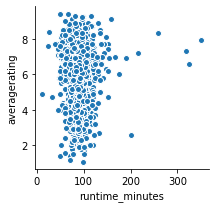

In [14]:
#create a scattered plot for the relationship between runtime and rating

graph_runtime = sns.FacetGrid(top_voted)
# map the above form facetgrid with some attributes
graph_runtime.map(plt.scatter, "runtime_minutes", "averagerating", edgecolor ="w").add_legend()
# show the object
plt.show()

# Movie's Budgets

In [15]:
# we load the csv and save it in a Dataframe

budgets = pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz')
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [16]:
budgets.info()

#we can see that there are 0 not null data, but in the cell above we can see 0 values
#We also see the datatypes for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [17]:
#we change the dtype of the date to a datetime so we can split the year and month of each movie

budgets["release_date"] = pd.to_datetime(budgets["release_date"])

In [18]:
#we create a column named month and year so we can save that in the dataframe
budgets['month'] = budgets["release_date"].dt.month_name()

budgets['year'] = budgets["release_date"].dt.year
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",December,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June,2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,December,2018
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",April,1999
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",July,2005
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,September,2015


In [19]:
#we clean the worlwide gross and production budget columns so we can sum the values

budgets['worldwide_gross'] = budgets.worldwide_gross.apply(lambda x:x.replace('$','').replace(',',''))
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(float)

budgets['production_budget'] = budgets.production_budget.apply(lambda x:x.replace('$','').replace(',',''))
budgets['production_budget'] = budgets['production_budget'].astype(float)

In [20]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,1,2009-12-18,Avatar,425000000.0,"$760,507,625",2.776345e+09,December,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,May,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,June,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,December,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,$0,0.000000e+00,December,2018
5778,79,1999-04-02,Following,6000.0,"$48,482",2.404950e+05,April,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,"$1,338",1.338000e+03,July,2005
5780,81,2015-09-29,A Plague So Pleasant,1400.0,$0,0.000000e+00,September,2015


In [21]:
#we add a season column so we can also filter the data by season if its neccesary

season_dict = {'January': 'Winter',
               'February': 'Winter',
               'March': 'Spring', 
               'April': 'Spring',
               'May': 'Spring',
               'June': 'Summer',
               'July': 'Summer',
               'August': 'Summer',
               'September': 'Fall',
               'October': 'Fall',
               'November': 'Fall',
               'December': 'Winter'}
budgets['Season'] = budgets['month'].apply(lambda x: season_dict[x])

In [22]:
# we filter the data to get relevant information
recent_movies =  budgets.query("year >= 2012").iloc[:1400]
recent_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,Season
2,3,2019-06-07,Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,June,2019,Summer
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,May,2015,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,December,2017,Winter
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,"$936,662,225",2.053311e+09,December,2015,Winter
6,7,2018-04-27,Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,April,2018,Spring
...,...,...,...,...,...,...,...,...,...
5044,45,2015-12-18,Saul fia,1700000.0,"$1,777,043",9.696537e+06,December,2015,Winter
5047,48,2019-02-01,Braid,1660000.0,$0,8.074500e+04,February,2019,Winter
5059,60,2014-09-26,Two Night Stand,1600000.0,"$15,600",8.680810e+05,September,2014,Fall
5063,64,2016-10-21,Moonlight,1500000.0,"$27,854,931",6.524551e+07,October,2016,Fall


In [23]:
recent_movies.count()

id                   1400
release_date         1400
movie                1400
production_budget    1400
domestic_gross       1400
worldwide_gross      1400
month                1400
year                 1400
Season               1400
dtype: int64

In [24]:
#This cell get the sum of all the gross grouped by month

sum_gross = recent_movies.groupby('month')[['worldwide_gross']].sum().sort_values(by='worldwide_gross', ascending=False)
sum_gross.index.name = "month"
sum_gross.reset_index(inplace=True)
sum_gross

,month,worldwide_gross
0,November,2.462244e+10
1,June,2.292101e+10
2,December,2.290977e+10
3,May,2.257021e+10
4,July,2.146751e+10
5,March,1.774840e+10
6,February,1.358781e+10
7,April,1.251088e+10
8,August,1.040229e+10
9,October,1.030930e+10


Text(0, 0.5, 'Sum Gross Revenue (in 100 Millions)')

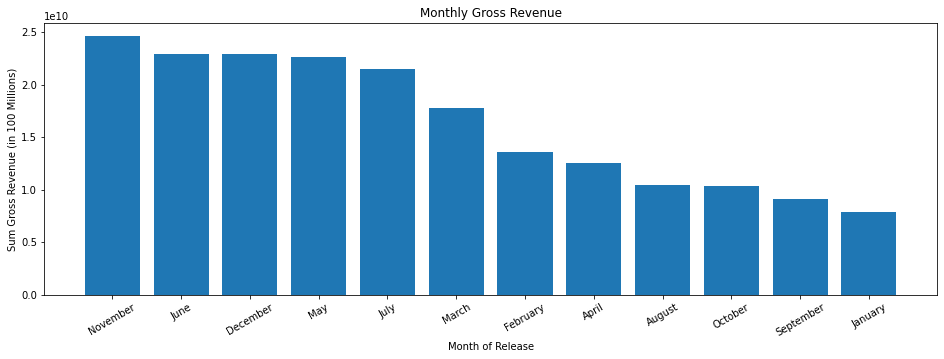

In [25]:
#Plot for the sum montly gross worldwide

fig = plt.subplots( figsize=(16, 5))

months = sum_gross['month']
gross_profit = sum_gross['worldwide_gross']
# Plot data
plt.bar(months, gross_profit)

# Customize appearance
plt.tick_params(axis="x", labelrotation=30)
plt.title('Monthly Gross Revenue')
plt.xlabel('Month of Release')
plt.ylabel("Sum Gross Revenue (in 100 Millions)")

In [26]:
#we grouped the data by moth so we can have the worldwide gross per month

avrg_gross = recent_movies.groupby('month')[['worldwide_gross']].mean().sort_values(by='worldwide_gross', ascending=False)
avrg_gross.index.name = "month"
avrg_gross.reset_index(inplace=True)
avrg_gross

,month,worldwide_gross
0,May,2.257021e+08
1,July,2.213145e+08
2,June,2.122316e+08
3,November,1.938774e+08
4,December,1.414183e+08
5,March,1.344576e+08
6,February,1.235255e+08
7,April,1.214648e+08
8,August,9.543388e+07
9,October,8.054144e+07


Text(0, 0.5, 'Average Gross Revenue (in 100 Millions)')

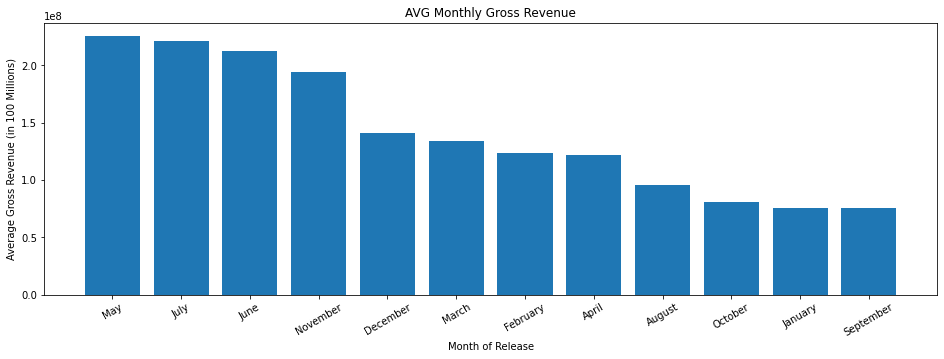

In [27]:
#Plot for the avg montly gross worldwide

fig = plt.subplots( figsize=(16, 5))

months = avrg_gross['month']
gross_profit = avrg_gross['worldwide_gross']
# Plot data
plt.bar(months, gross_profit)

# Customize appearance
plt.tick_params(axis="x", labelrotation=30)
plt.title('AVG Monthly Gross Revenue')
plt.xlabel('Month of Release')
plt.ylabel("Average Gross Revenue (in 100 Millions)")

In [28]:
#We create a df to make an analysis by season
seasons_gross = recent_movies.groupby('Season')[['worldwide_gross']].mean().sort_values(by='worldwide_gross', ascending=False)
seasons_gross.index.name = "Season"
seasons_gross.reset_index(inplace=True)
seasons_gross

,Season,worldwide_gross
0,Summer,1.744930e+08
1,Spring,1.577000e+08
2,Winter,1.180445e+08
3,Fall,1.173838e+08


Text(0, 0.5, 'Average Gross Revenue (in Millions)')

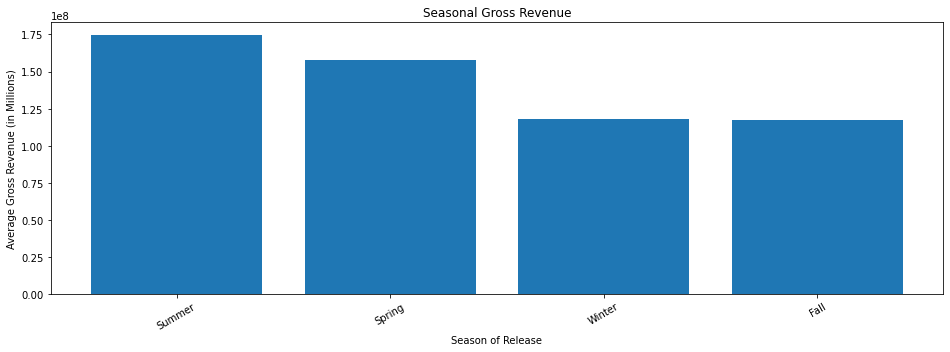

In [29]:
#we create a bar plot to see the seasonal gross revenue

fig = plt.subplots( figsize=(16, 5))

season = seasons_gross['Season']
gross = seasons_gross['worldwide_gross']
# Plot data
plt.bar(season, gross)

# Customize appearance
plt.tick_params(axis="x", labelrotation=30)
plt.title('Seasonal Gross Revenue')
plt.xlabel('Season of Release')
plt.ylabel("Average Gross Revenue (in Millions)")

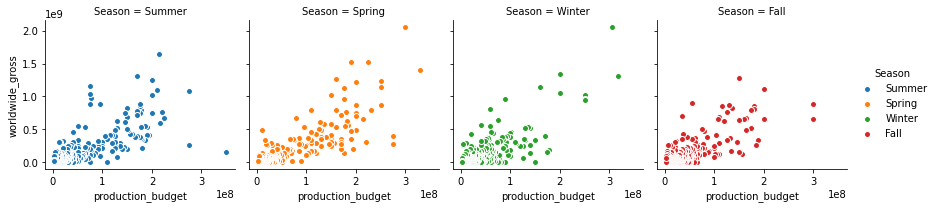

In [30]:
#we create a scattered plot to see the seasonal gross revenue

graph = sns.FacetGrid(recent_movies, col ="Season",  hue ="Season")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "production_budget", "worldwide_gross", edgecolor ="w").add_legend()
# show the object
plt.show()